In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
other = sio.loadmat('UCFsports_otherapproaches.mat')
ma_2015 = sio.loadmat('trees_maetal.mat')
fat   = sio.loadmat('CNN_UCFsports_myresults.mat')

In [4]:
iou = np.linspace(0.1, 0.6, 6)

In [5]:
fat_auc = np.zeros((6,))
for i in xrange(6): 
    fat_auc[i] = fat['output'][0]['auc'][i]
fat_auc

array([ 0.56179104,  0.55853767,  0.55853767,  0.51868175,  0.49105582,
        0.41148925])

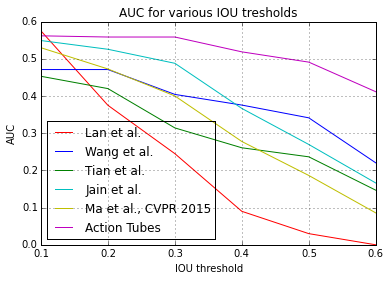

In [6]:
plt.plot(iou, np.reshape(other['lanetal'], (6,)), 'r', label = 'Lan et al.')
plt.plot(iou, np.reshape(other['poselets_wangetal'],(6,)), 'b', label = 'Wang et al.')
plt.plot(iou, np.reshape(other['sdpm'], (6,)), 'g', label = 'Tian et al.')
plt.plot(iou, np.reshape(other['tubelet_jainetal'], (6,)), 'c', label = 'Jain et al.')
plt.plot(iou, np.reshape(ma_2015['AUC'], (6,)), 'y', label = 'Ma et al., CVPR 2015')
plt.plot(iou, fat_auc, 'm', label = 'Action Tubes')
plt.grid()
plt.xlabel('IOU threshold')
plt.ylabel('AUC')
plt.title('AUC for various IOU tresholds')
plt.legend(loc = 'lower left')

In [7]:
roc_jainetal = other['tubelet_ROC_curve']
roc_wangetal = other['poselets_ROC_curve']
roc_sdpm = other['sdpm_ROC_curve'] 

fat_fpr = fat['output'][0]['fpr'][1]
fat_tpr = fat['output'][0]['tpr'][1]

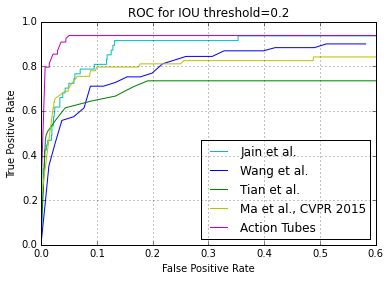

In [8]:
pick = np.where(roc_jainetal[:,0]<=0.6)[0]
plt.plot(roc_jainetal[pick,0],roc_jainetal[pick,1],'c',label='Jain et al.')
pick = np.where(roc_wangetal[:,0]<=0.6)[0]
plt.plot(roc_wangetal[pick,0],roc_wangetal[pick,1],'b',label='Wang et al.')
pick = np.where(roc_sdpm[:,0]<=0.6)[0]
plt.plot(roc_sdpm[pick,0],roc_sdpm[pick,1],'g',label='Tian et al.')
pick = np.where(ma_2015['all_fpr']<=0.6)[0]
plt.plot(ma_2015['all_fpr'][pick], ma_2015['all_tpr'][pick], 'y', label='Ma et al., CVPR 2015')
plt.plot(fat_fpr, fat_tpr, 'm', label='Action Tubes')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for IOU threshold=0.2')
plt.legend(loc='lower right')